In [101]:
import random
import torch

from utils.Logger import showPlot
from utils.Timer import asMinutes, timeSince

%load_ext autoreload
from data.ConstList_Data import Lang, prepareData
from model.seq2seq_Model import (
    Seq2Seq_GRU_Attn_ptModel, 
    Seq2SeqTranslate_ptTokenizer,
)
from baseline_ExpTrain import example_ExpTrain
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
DATA_DIR = '../'

# import os
# print(os.listdir(DATA_DIR))

## setup Experiment

In [63]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## setup Data

In [110]:
%load_ext autoreload
from data.ConstList_Data import Lang, prepareData
%autoreload

## Data
MAX_LENGTH = 40

input_lang, output_lang, pairs = prepareData(
        'shuffled_elements', 'src_elements', DATA_DIR, 
        max_length=MAX_LENGTH, copy_num=5, reverse=False)

pair = random.choice(pairs)
print(pair[0], '\n', pair[1])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Reading jsons...
['question', 'label', '/label', 'info', '/info', 'info', '/info', 'question', 'label', '/label', 'instruction', 'formula', '/formula', 'formula', '/formula', 'formula', '/formula', 'formula', 'ansColumn', 'ansColumn', 'ansColumn', 'ansColumn', '/formula', 'formula', 'ansColumn', 'ansColumn', '/formula', 'formula', 'ansColumn', 'ansColumn', '/formula', '/instruction', 'page_num', '/page_num']
585 2 63 63
question /label formula /formula formula label instruction
Read 585 sentence pairs
Trimmed to 585 sentence pairs
Counting words...
Counted words:
shuffled_elements 27
src_elements 27
/formula /formula ansColumn formula ansColumn formula ansColumn formula /formula 
 formula /formula formula /formula formula ansColumn ansColumn ansColumn /formula


## setup Model

In [111]:
## Model
hidden_size = 256

tokenizer = Seq2SeqTranslate_ptTokenizer(
                input_lang, output_lang, device)
seq2seq_model = Seq2Seq_GRU_Attn_ptModel(
                input_lang.n_words, output_lang.n_words, hidden_size,
                tokenizer, device,, dropout_p=0.1, max_length=MAX_LENGTH)

## setup exec

100%|██████████| 75/75 [00:01<00:00, 39.46it/s]


<Figure size 432x288 with 0 Axes>

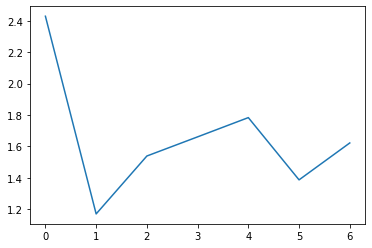

In [113]:
exp_train = example_ExpTrain(pairs)
# test
exp_train.exec(seq2seq_model, 75,
                print_every=1000, plot_every=10, 
                learning_rate=0.01, log_dir='_logs')

# 本実験
# exp_train.exec(seq2seq_model, 75000,
#                 print_every=5000, plot_every=1000, 
#                 learning_rate=0.01, log_dir='_logs')

___

## evaluate
- random print
- Acc
- BLEU などの 評価指標

In [114]:
%load_ext autoreload
from baseline_ExpEval import eval_print_randomly
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
# eval_print_randomly(seq2seq_model, pairs)
evaluate_batch_randomly(seq2seq_model, pairs)

> page_num /page_num /choice cNum /cNum /question /choices
= cNum /cNum /choice /choices /question page_num /page_num
< cNum /cNum formula /formula /choice choice cNum 

> formula formula /formula ansColumn formula /formula ansColumn
= formula /formula formula ansColumn /formula formula ansColumn
< formula formula formula /formula formula formula /formula formula 

> ansColumn ansColumn formula formula /formula /formula /formula ansColumn formula
= formula /formula formula /formula formula ansColumn ansColumn ansColumn /formula
< formula formula formula formula formula /formula formula formula formula /formula

> page_num /ref /formula /instruction ref formula /page_num
= formula /formula ref /ref /instruction page_num /page_num
< formula /formula /formula /instruction page_num /page_num 

> cNum /cNum cNum choice /formula choice /choice formula /cNum
= choice cNum /cNum formula /formula /choice choice cNum /cNum
< /formula /choice choice cNum /cNum formula /formula /choice choice cNum